In [110]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [111]:
Train_data=pd.read_csv("food_train.csv")
Test_data=pd.read_csv("food_test.csv")

In [112]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm ? 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am ? 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am ? 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [113]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [114]:
Train_data.shape

(12690, 9)

In [115]:
Train_data.isnull().values.any()

True

In [116]:
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

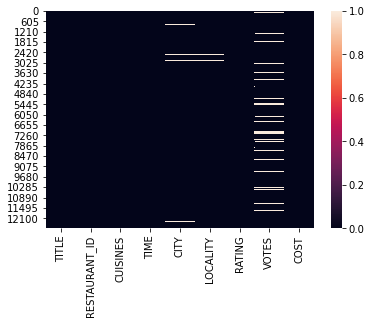

In [117]:
sns.heatmap(Train_data.isnull())
plt.show()

In [118]:
Train_data.dropna(inplace=True)

In [119]:
Train_data.isnull().values.any()

False

In [120]:
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [121]:
Train_data.shape

(11393, 9)

In [122]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11393 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11393 non-null  object
 1   RESTAURANT_ID  11393 non-null  int64 
 2   CUISINES       11393 non-null  object
 3   TIME           11393 non-null  object
 4   CITY           11393 non-null  object
 5   LOCALITY       11393 non-null  object
 6   RATING         11393 non-null  object
 7   VOTES          11393 non-null  object
 8   COST           11393 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 890.1+ KB


In [123]:
Train_data.describe()

,RESTAURANT_ID,COST
count,11393.000000,11393.000000
mean,7791.278329,682.670148
std,4508.401395,646.942238
min,0.000000,50.000000
25%,3883.000000,300.000000
50%,7807.000000,500.000000
75%,11730.000000,800.000000
max,15573.000000,14000.000000


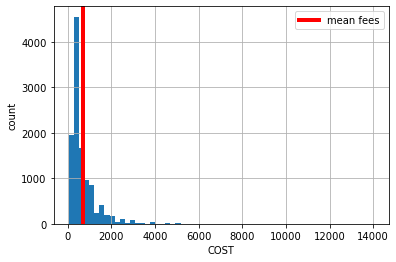

In [124]:
COST=Train_data['COST'].hist(bins=60)
mean_val=np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

In [125]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [126]:
Train_data.TITLE.value_counts()

QUICK BITES                 3674
CASUAL DINING               3399
None                         800
CAF                         543
DESSERT PARLOR               340
                            ... 
SWEET SHOP,BEVERAGE SHOP       1
MEAT SHOP                      1
LOUNGE,FINE DINING             1
DESSERT PARLOR,PAAN SHOP       1
CASUAL DINING,FOOD COURT       1
Name: TITLE, Length: 111, dtype: int64

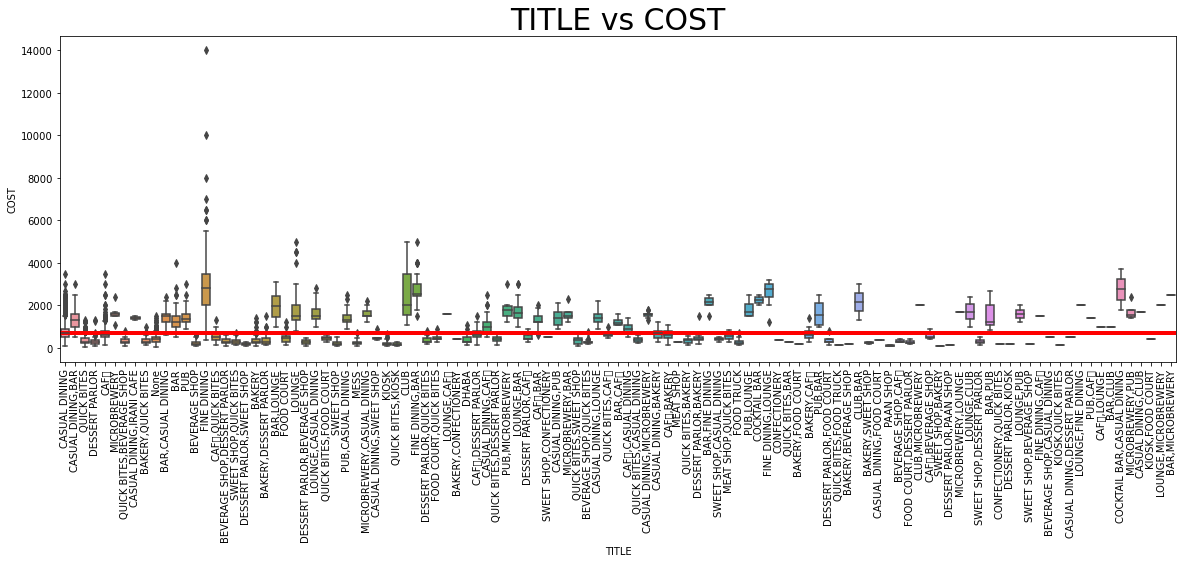

In [127]:
plt.figure(figsize=(20,6))
mean_COST=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='TITLE',data=Train_data)
plt.axhline(mean_COST,linewidth=4,color='red',label='mean COST')
plt.title("TITLE vs COST",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

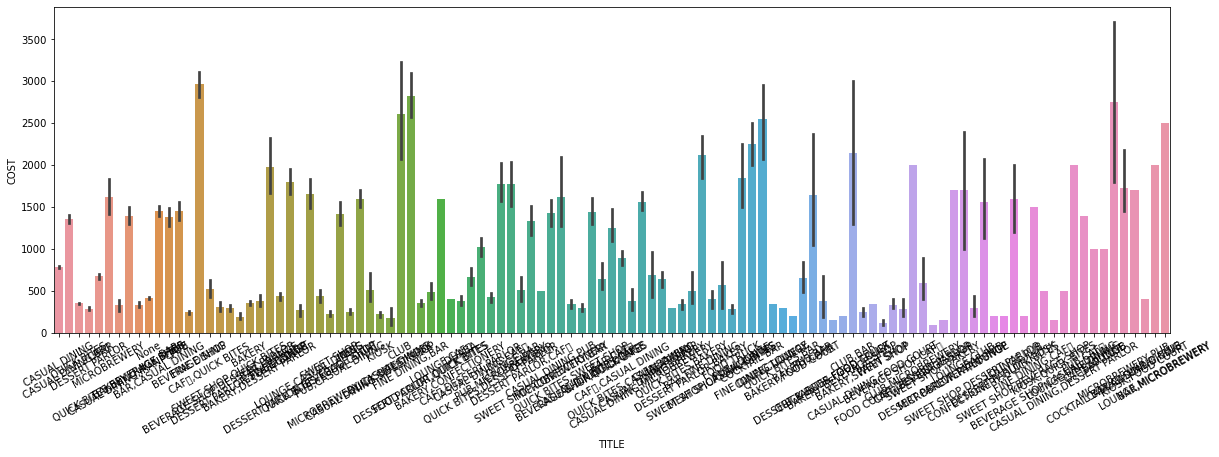

In [128]:
plt.figure(figsize=(20,6))
sns.barplot(y='COST',x='TITLE',data=Train_data)
plt.xticks(rotation=30)
plt.show()

In [129]:
Train_data.RESTAURANT_ID.value_counts()

7264     7
9910     6
4634     6
11971    5
1521     5
        ..
12771    1
14818    1
8673     1
10720    1
0        1
Name: RESTAURANT_ID, Length: 10705, dtype: int64

In [130]:
Train_data.CUISINES.value_counts()

North Indian, Chinese                                               457
South Indian                                                        456
North Indian                                                        449
Fast Food                                                           238
Chinese                                                             155
                                                                   ... 
Mughlai, Kebab, Rolls, Fast Food                                      1
Chinese, North Indian, Kerala, Seafood, Fast Food                     1
Cafe, Continental, Coffee                                             1
European, Cafe, Italian, Salad, Sandwich, Continental, American,      1
Modern Indian, Italian, European                                      1
Name: CUISINES, Length: 3913, dtype: int64

In [131]:
Train_data.TIME.value_counts()

11am ? 11pm (Mon-Sun)                             1246
12noon ? 12midnight (Mon-Sun)                      434
12noon ? 11pm (Mon-Sun)                            382
11am ? 12midnight (Mon-Sun)                        278
12noon ? 1am (Mon-Sun)                             188
                                                  ... 
11am ? 4pm, 7pm ? 1am (Mon-Sun)                      1
8pm ? 12midnight (Mon-Sun)                           1
11am ? 3:30pm, 6:30pm ? 3am (Mon-Sun)                1
3pm ? 2am (Mon, Wed, Thu, Fri, Sat, Sun)...          1
Closed (Mon),12noon ? 4pm, 7:30pm ? 11:30pm...       1
Name: TIME, Length: 2543, dtype: int64

In [132]:
Train_data.CITY.value_counts()

Chennai            2135
Bangalore          1977
Hyderabad          1806
Mumbai             1578
New Delhi          1210
                   ... 
Perungudi             1
Attapur.              1
Kochi Aluva 102       1
Vadapalani.           1
Perambur              1
Name: CITY, Length: 336, dtype: int64

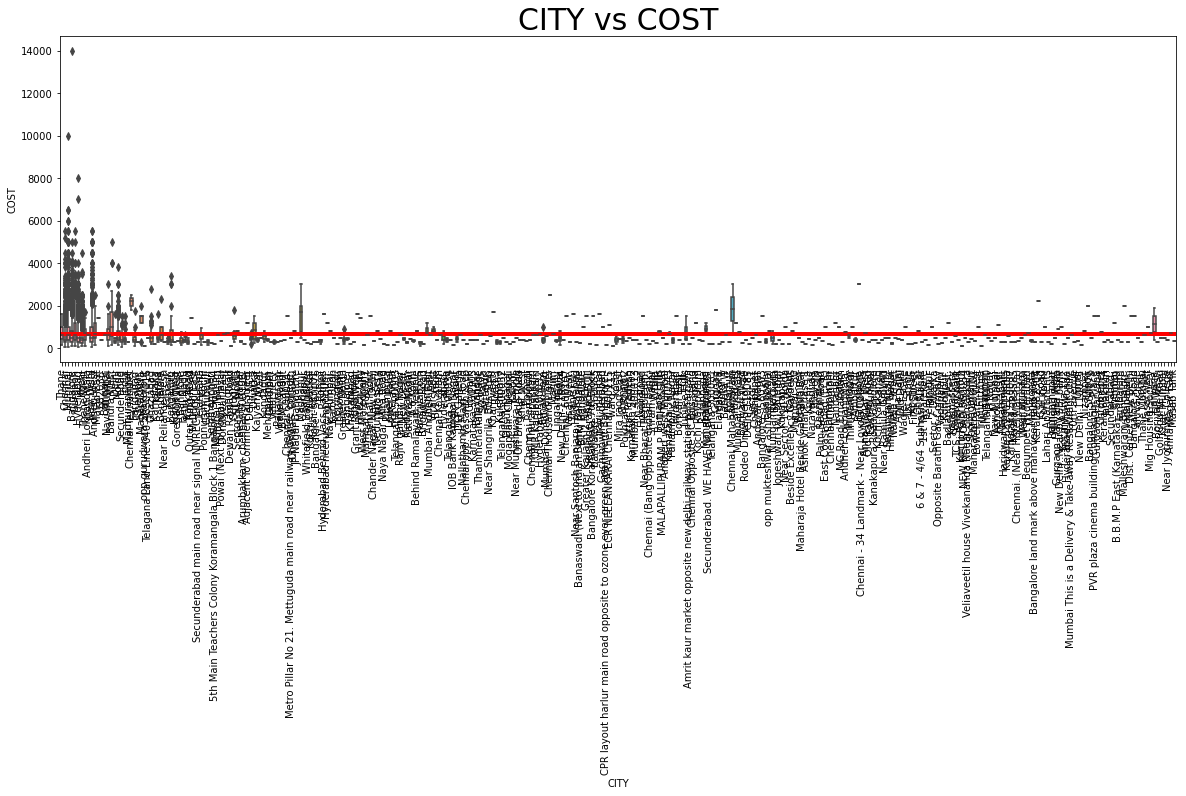

In [133]:
plt.figure(figsize=(20,6))
mean_COST=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='CITY',data=Train_data)
plt.axhline(mean_COST,linewidth=4,color='red',label='mean COST')
plt.title("CITY vs COST",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

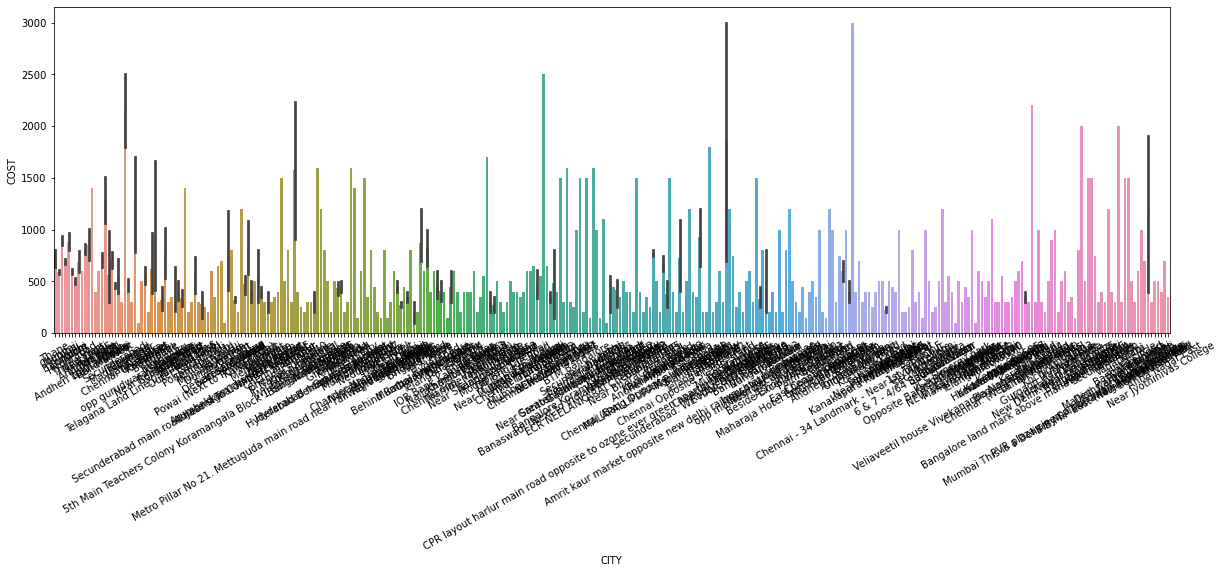

In [134]:
plt.figure(figsize=(20,6))
sns.barplot(y='COST',x='CITY',data=Train_data)
plt.xticks(rotation=30)
plt.show()

In [135]:
Train_data.LOCALITY.value_counts()

Gachibowli              166
Indiranagar             132
Madhapur                116
Kukatpally              115
HSR                     113
                       ... 
Chennai-600040            1
6th Avenue                1
Eloor                     1
RR Nagar                  1
Near Anna Nagar East      1
Name: LOCALITY, Length: 1311, dtype: int64

In [136]:
Train_data.RATING.value_counts()

3.9    1236
3.8    1184
4.0    1092
3.7    1077
3.6     940
4.1     926
3.5     762
4.2     714
3.4     570
4.3     553
3.3     363
4.4     359
3.2     265
4.5     196
2.9     186
3.1     185
3.0     169
2.8     146
4.6     134
2.7      89
4.7      66
2.6      61
2.5      35
4.8      31
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

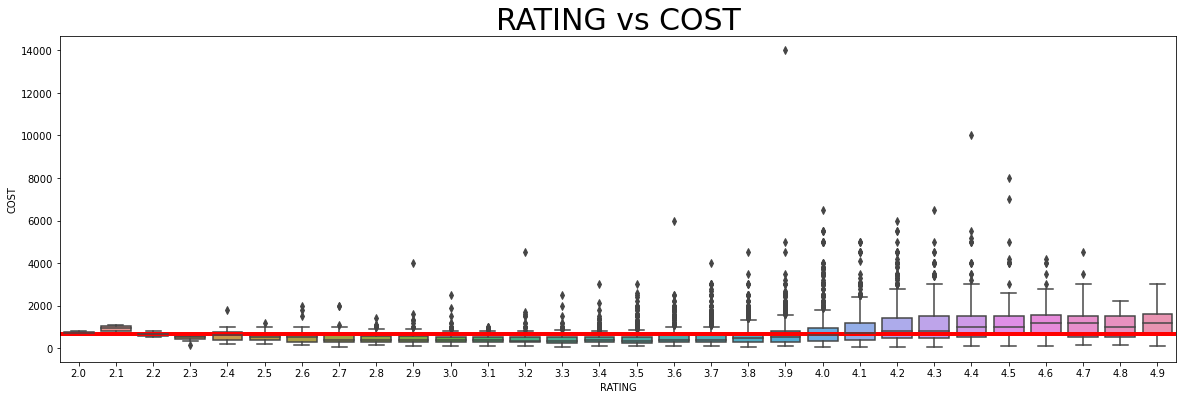

In [137]:
plt.figure(figsize=(20,6))
mean_COST=np.mean(Train_data['COST'])
sns.boxplot(y='COST',x='RATING',data=Train_data)
plt.axhline(mean_COST,linewidth=4,color='red',label='mean COST')
plt.title("RATING vs COST",fontsize=30)
plt.xticks(rotation='0')
plt.show()

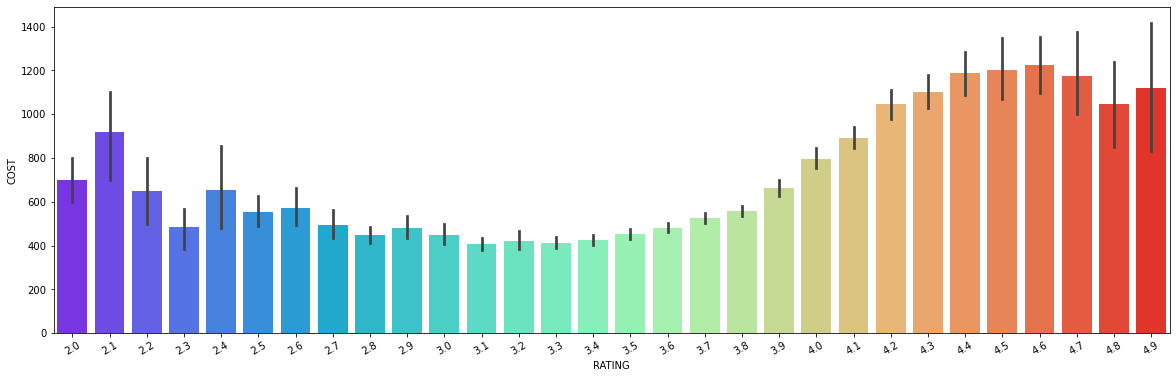

In [138]:
plt.figure(figsize=(20,6))
sns.barplot(y='COST',x='RATING',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

In [139]:
Train_data.VOTES.value_counts()

44 votes      69
28 votes      65
38 votes      65
29 votes      65
35 votes      64
              ..
1746 votes     1
2214 votes     1
562 votes      1
1508 votes     1
3695 votes     1
Name: VOTES, Length: 1846, dtype: int64

In [140]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [141]:
TITLE=Train_data['TITLE']
TITLE=pd.get_dummies(TITLE,drop_first=True)
TITLE.head()

,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT","BAKERY,QUICK BITES","BAKERY,SWEET SHOP",BAR,"BAR,CAF","BAR,CASUAL DINING",...,"QUICK BITES,FOOD TRUCK","QUICK BITES,KIOSK","QUICK BITES,SWEET SHOP",SWEET SHOP,"SWEET SHOP,BAKERY","SWEET SHOP,BEVERAGE SHOP","SWEET SHOP,CASUAL DINING","SWEET SHOP,CONFECTIONERY","SWEET SHOP,DESSERT PARLOR","SWEET SHOP,QUICK BITES"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
CITY=Train_data['CITY']
CITY=pd.get_dummies(CITY,drop_first=True)
CITY.head()

,1st Stage,1st Tavarekere,3rd Street,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,6 & 7 - 4/64 Subhash Nagar,682036,Adjacent To Commercial Street,Aluva,Ambattur,Amrit kaur market opposite new delhi railway station paharganj,...,chennai,chullickal,hyderabad,khar west,kochi,navi mumbai,opp gurudwara Shakurpur,opp mukteshwar ashram powai,p.o Kochi,ward X11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
RATING=Train_data['RATING']
RATING=pd.get_dummies(RATING,drop_first=True)
RATING.head()

,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
Train_data.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [145]:
Train_data.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm ? 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am ? 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am ? 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [146]:
train=pd.concat([Train_data,TITLE,CITY,RATING],axis=1)

In [147]:
train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,"BAKERY,BEVERAGE SHOP","BAKERY,CAF",...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,CASUAL DINING,"Malwani, Goan, North Indian","11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm ? 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,0,0,...,0,0,1,0,0,0,0,0,0,0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,0,0,...,0,0,0,0,0,0,0,0,0,0
3,QUICK BITES,"Tibetan, Chinese",11:30am ? 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,0,0,...,0,1,0,0,0,0,0,0,0,0
4,DESSERT PARLOR,Desserts,11am ? 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
train.drop(['TITLE','CITY','RATING'],axis=1,inplace=True)
train.head()

,CUISINES,TIME,LOCALITY,VOTES,COST,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT",...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,"Malwani, Goan, North Indian","11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)",Dombivali East,49 votes,1200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Asian, Modern Indian, Japanese",6pm ? 11pm (Mon-Sun),Ramapuram,30 votes,1500,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,"North Indian, Chinese, Biryani, Hyderabadi","11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)",Saligramam,221 votes,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Tibetan, Chinese",11:30am ? 1am (Mon-Sun),Bandra West,24 votes,800,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Desserts,11am ? 1am (Mon-Sun),Lower Parel,165 votes,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
train.shape

(11393, 479)

In [150]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [151]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [152]:
Test_data.dropna(inplace=True)

In [153]:
Test_data.isnull().values.any()

False

In [154]:
Test_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [155]:
print("TITLE")
print(Test_data["TITLE"].value_counts())
TITLE=pd.get_dummies(TITLE,drop_first=True)
print()

print("CITY")
print(Test_data["CITY"].value_counts())
CITY=pd.get_dummies(CITY,drop_first=True)
print()

print("RATING")
print(Test_data["RATING"].value_counts())
RATING=pd.get_dummies(RATING,drop_first=True)
print()


TITLE
QUICK BITES                 1225
CASUAL DINING               1157
None                         240
CAF                         205
DESSERT PARLOR               109
                            ... 
BAR,LOUNGE                     1
PUB,LOUNGE                     1
CLUB,BAR                       1
CASUAL DINING,FOOD COURT       1
CASUAL DINING,IRANI CAFE       1
Name: TITLE, Length: 83, dtype: int64

CITY
Chennai                                          671
Hyderabad                                        637
Bangalore                                        633
Mumbai                                           547
New Delhi                                        399
                                                ... 
opposite to western side of ITPL Service gate      1
Balavinayagar Nagar Chennai                        1
Thane West Thane West                              1
Palarivattom                                       1
Chennai Injambakkam                                1
Name

In [156]:
test=pd.concat([Test_data,TITLE,CITY,RATING],axis=1)
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,"BAKERY,BEVERAGE SHOP","BAKERY,CAF",...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,CASUAL DINING,4085.0,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,QUICK BITES,12680.0,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,1411.0,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,None,204.0,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,QUICK BITES,13453.0,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
test.drop(['TITLE','CITY','RATING'],axis=1,inplace=True)
test.head()

,RESTAURANT_ID,CUISINES,TIME,LOCALITY,VOTES,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT",...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
0,4085.0,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Sector 18,564 votes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12680.0,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Grant Road,61 votes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1411.0,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Marine Lines,350 votes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,204.0,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",NIT,1445 votes,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13453.0,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kaloor,23 votes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
test.shape

(11781, 479)

In [159]:
Train_data.describe()

,COST
count,11393.000000
mean,682.670148
std,646.942238
min,50.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


In [160]:
Train_cor=Train_data.corr()
Train_cor

,COST
COST,1.0


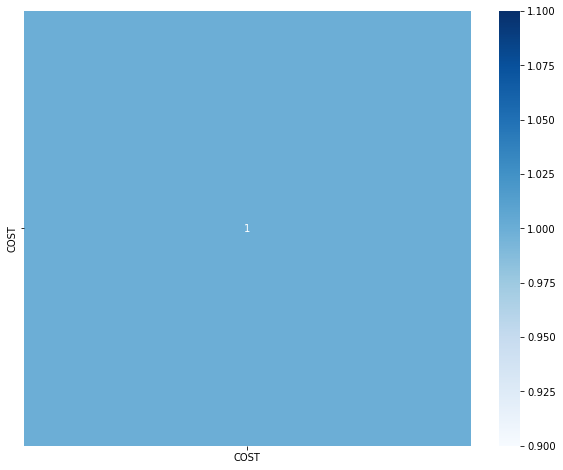

In [161]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),cmap='Blues',annot=True)
plt.show()

In [162]:
for col in train.columns:
    if train[col].dtypes=='object':
        le=LabelEncoder()
        train[col]=le.fit_transform(train[col])

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[0.31326892, 0.581754  , 0.92008022, ..., 0.07633338, 0.05223402,
        0.04398575],
       [1.61021315, 0.97380249, 0.96832289, ..., 0.07633338, 0.05223402,
        0.04398575],
       [0.60952736, 0.69074203, 1.11525916, ..., 0.07633338, 0.05223402,
        0.04398575],
       ...,
       [0.12628365, 0.0353984 , 1.73021464, ..., 0.07633338, 0.05223402,
        0.04398575],
       [1.05347546, 0.91010818, 0.05750993, ..., 0.07633338, 0.05223402,
        0.04398575],
       [0.5831542 , 0.44870367, 1.70572526, ..., 0.07633338, 0.05223402,
        0.04398575]])

In [164]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     1, ..., 11390, 11391, 11392], dtype=int64), array([414, 465,  35, ..., 469, 464, 463], dtype=int64))


In [165]:
train_new=train[(z<3).all(axis=1)]

In [166]:
print(train.shape,'\t\t', train_new.shape)

(11393, 479) 		 (1335, 479)


In [167]:
train=train_new
train.shape

(1335, 479)

In [168]:
train.shape

(1335, 479)

In [169]:
train.columns

Index(['CUISINES', 'TIME', 'LOCALITY', 'VOTES', 'COST', 'BAKERY,BEVERAGE SHOP',
       'BAKERY,CAF', 'BAKERY,CONFECTIONERY', 'BAKERY,DESSERT PARLOR',
       'BAKERY,FOOD COURT',
       ...
       '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9'],
      dtype='object', length=479)

In [170]:
x=train.drop(columns=['COST'],axis=1)
x.head()

,CUISINES,TIME,LOCALITY,VOTES,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT","BAKERY,QUICK BITES",...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
2,2800,623,1015,711,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3697,1922,134,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,104,623,1198,1333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2770,794,1220,1201,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,3323,1949,1170,614,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
y=train['COST']
y.head()

2     800
8     300
23    600
41    300
59    800
Name: COST, dtype: int64

In [172]:
print(x.shape,'\t\t',y.shape)

(1335, 478) 		 (1335,)


In [173]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [175]:
print(x_train.shape,'\t\t',x_test.shape)

(1315, 478) 		 (20, 478)


In [176]:
print(y_train.shape,'\t\t',y_test.shape)

(1315,) 		 (20,)


In [177]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [178]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),
       DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('**********************************************************************')
    print('\n')

Score of LinearRegression() is: 0.41716771762081617
MAE: 184.07646855691542
MSE: 55678.4323526168
RMSE: 235.96277747267004
R2 score: 0.44529581715948396
**********************************************************************


Score of Lasso() is: 0.419148905644145
MAE: 184.7034959505986
MSE: 55550.74446297132
RMSE: 235.69205430597637
R2 score: 0.44656792564910264
**********************************************************************


Score of Ridge() is: 0.41922979200770316
MAE: 184.99113579648932
MSE: 55688.5083307959
RMSE: 235.98412728570517
R2 score: 0.44519543381523385
**********************************************************************


Score of ElasticNet() is: 0.3921343503261431
MAE: 191.5586386724612
MSE: 57168.55355709545
RMSE: 239.09946373234604
R2 score: 0.4304502758944413
**********************************************************************


Score of SVR() is: 0.10136529168440322
MAE: 218.4327704948505
MSE: 84232.85299196746
RMSE: 290.2289664936418
R2 score: 0.1608184

In [179]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),
       DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model :",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('**********************************************************************')
    print('\n')

Model : LinearRegression()
Score: [0.40637808 0.39190597 0.43753376 0.43353477 0.34010717 0.34681648
 0.28174836 0.46937656 0.43895629 0.5387606 ]
Mean Score: 0.4085118050090582
Standard deviation: 0.06920935128906724
**********************************************************************


Model : Lasso()
Score: [0.40666285 0.3918883  0.45264073 0.42642033 0.34791865 0.34360403
 0.28495392 0.46885988 0.45751264 0.55039463]
Mean Score: 0.413085596718816
Standard deviation: 0.07187729159730782
**********************************************************************


Model : Ridge()
Score: [0.40578144 0.39098811 0.45251963 0.42395012 0.34816639 0.34401484
 0.28276558 0.47018503 0.45734357 0.54876393]
Mean Score: 0.41244786352381346
Standard deviation: 0.07197705547860904
**********************************************************************


Model : ElasticNet()
Score: [0.39052561 0.37431001 0.42506405 0.46054314 0.30580617 0.29693853
 0.28949645 0.43438356 0.44885856 0.4921606 ]
Mean Sco

In [180]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 4, 'n_estimators': 600}


In [183]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
RF.fit(x_train,y_train)
print('Score:',RF.score(x_train,y_train))
y_pred=RF.predict(x_test)
print('\n')

print('MEA:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('\n')
print('R2 score:',r2_score(y_test,predm))
print('\n')

Score: 0.741802402847497


MEA: 203.8625563462781
MSE: 60892.23815247137
RMSE: 246.76352678722878


R2 score: 0.3933525464261881




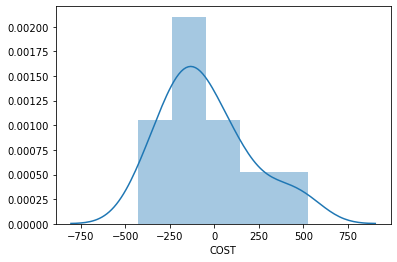

In [184]:
sns.distplot(y_test-y_pred)
plt.show()

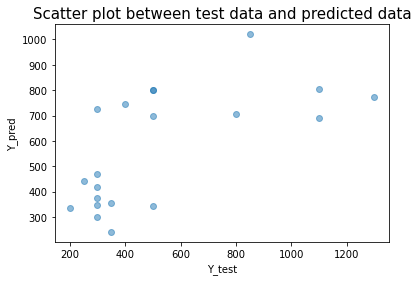

In [185]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [189]:
import joblib
joblib.dump(RF,"Restaurant food cost.pkl")

['Restaurant food cost.pkl']